In [53]:
import numpy as np

In [54]:
import pandas as pd

In [55]:
import tensorflow as tf

In [56]:
import seaborn as sns

In [57]:
import matplotlib.pyplot as plt 

In [58]:
from tensorflow.keras.models import Sequential

In [59]:
from tensorflow.keras.layers import Dense

In [60]:
from tensorflow.keras.optimizers import Adam, SGD 

In [61]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [62]:
data.head(17)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [63]:
print(data.shape)

(205, 26)


In [64]:
print(data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [65]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [66]:
data.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [69]:
from sklearn.preprocessing import LabelEncoder  

In [70]:
labelencoder = LabelEncoder()

In [71]:
data["fueltype"] = labelencoder.fit_transform(data["fueltype"])

In [72]:
data["aspiration"] = labelencoder.fit_transform(data["aspiration"])

In [73]:
data["carbody"] = labelencoder.fit_transform(data["carbody"])

In [74]:
data["drivewheel"] = labelencoder.fit_transform(data["drivewheel"])

In [75]:
data["enginelocation"] = labelencoder.fit_transform(data["enginelocation"])

In [76]:
data["fuelsystem"] = labelencoder.fit_transform(data["fuelsystem"])

In [77]:
data["doornumber"]= data["doornumber"].map({"two": 2, "four" :4})

In [78]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [80]:
corrmat = data.corr()

In [81]:
top_corr_features = corrmat.index

In [82]:
plt.figure(figsize= (20,20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

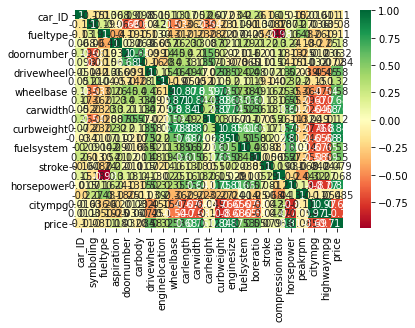

In [83]:
g=sns.heatmap(data[top_corr_features].corr(),annot =True,cmap ="RdYlGn")

In [84]:
data1= data[["horsepower", "boreratio", "enginesize", "curbweight", "carwidth", "carlength", "wheelbase", "drivewheel", "price", "enginelocation"]]

In [85]:
data1.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


In [86]:
print(data1.shape)

(205, 10)


In [87]:
x= (data1.loc[:, data1.columns != "price"])

In [88]:
y= (data1.loc[:, data1.columns == "price"])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state = 42)

In [39]:
model = Sequential()
model.add(tf.keras.layers.Dense(512, activation = "relu"))
model.add(tf.keras.layers.Dense(1, input_shape = (10,)))
    

In [40]:
model.compile(optimizer = "rmsprop", loss ="mse", metrics = ["mae"])

In [91]:
model.fit(x_train, y_train, epochs = 500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 11302650.0000 - mae: 2366.8630
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 11114126.0000 - mae: 2346.7305
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 11202349.0000 - mae: 2350.4629
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 11012567.0000 - mae: 2379.8274
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 11464596.0000 - mae: 2366.4707
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 11056229.0000 - mae: 2339.1802
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 11307302.0000 - mae: 2376.3428
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 11062681.0000 - mae: 2355.0930
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 11180489.0000 - mae: 2332.6128
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 11035693.0

5/5 [==============================] - 0s 1ms/step - loss: 11179804.0000 - mae: 2357.7468
Epoch 81/500
5/5 [==============================] - 0s 2ms/step - loss: 11178757.0000 - mae: 2369.1753
Epoch 82/500
5/5 [==============================] - 0s 1ms/step - loss: 11056405.0000 - mae: 2343.4209
Epoch 83/500
5/5 [==============================] - 0s 2ms/step - loss: 11213255.0000 - mae: 2368.7866
Epoch 84/500
5/5 [==============================] - 0s 1ms/step - loss: 11149787.0000 - mae: 2354.9536
Epoch 85/500
5/5 [==============================] - 0s 1ms/step - loss: 10982839.0000 - mae: 2334.5198
Epoch 86/500
5/5 [==============================] - 0s 2ms/step - loss: 11148118.0000 - mae: 2376.0938
Epoch 87/500
5/5 [==============================] - 0s 2ms/step - loss: 11248260.0000 - mae: 2383.3247
Epoch 88/500
5/5 [==============================] - 0s 1ms/step - loss: 11254018.0000 - mae: 2384.2063
Epoch 89/500
5/5 [==============================] - 0s 1ms/step - loss: 11120661.0000 

5/5 [==============================] - 0s 1ms/step - loss: 11147970.0000 - mae: 2368.6335
Epoch 159/500
5/5 [==============================] - 0s 2ms/step - loss: 11059600.0000 - mae: 2342.0442
Epoch 160/500
5/5 [==============================] - 0s 1ms/step - loss: 11086826.0000 - mae: 2386.8157
Epoch 161/500
5/5 [==============================] - 0s 2ms/step - loss: 11278776.0000 - mae: 2360.1387
Epoch 162/500
5/5 [==============================] - 0s 1ms/step - loss: 11067220.0000 - mae: 2372.8215
Epoch 163/500
5/5 [==============================] - 0s 1ms/step - loss: 11066530.0000 - mae: 2332.2568
Epoch 164/500
5/5 [==============================] - 0s 2ms/step - loss: 11186366.0000 - mae: 2378.0718
Epoch 165/500
5/5 [==============================] - 0s 1ms/step - loss: 11346646.0000 - mae: 2373.5339
Epoch 166/500
5/5 [==============================] - 0s 1ms/step - loss: 11473237.0000 - mae: 2386.7783
Epoch 167/500
5/5 [==============================] - 0s 1ms/step - loss: 10993

5/5 [==============================] - 0s 2ms/step - loss: 11036460.0000 - mae: 2336.0913
Epoch 237/500
5/5 [==============================] - 0s 1000us/step - loss: 11116402.0000 - mae: 2364.5339
Epoch 238/500
5/5 [==============================] - 0s 1ms/step - loss: 11139949.0000 - mae: 2329.4304
Epoch 239/500
5/5 [==============================] - 0s 1ms/step - loss: 11069719.0000 - mae: 2355.5935
Epoch 240/500
5/5 [==============================] - 0s 2ms/step - loss: 11041979.0000 - mae: 2350.7341
Epoch 241/500
5/5 [==============================] - 0s 1ms/step - loss: 11027315.0000 - mae: 2343.4209
Epoch 242/500
5/5 [==============================] - 0s 2ms/step - loss: 11065445.0000 - mae: 2344.8184
Epoch 243/500
5/5 [==============================] - 0s 1ms/step - loss: 11027405.0000 - mae: 2343.4431
Epoch 244/500
5/5 [==============================] - 0s 1ms/step - loss: 11032822.0000 - mae: 2334.9031
Epoch 245/500
5/5 [==============================] - 0s 2ms/step - loss: 11

5/5 [==============================] - 0s 2ms/step - loss: 11137897.0000 - mae: 2391.4507
Epoch 315/500
5/5 [==============================] - 0s 1ms/step - loss: 11060361.0000 - mae: 2338.1814
Epoch 316/500
5/5 [==============================] - 0s 2ms/step - loss: 11016701.0000 - mae: 2352.3394
Epoch 317/500
5/5 [==============================] - 0s 2ms/step - loss: 11177462.0000 - mae: 2359.6450
Epoch 318/500
5/5 [==============================] - 0s 1ms/step - loss: 11231959.0000 - mae: 2352.7075
Epoch 319/500
5/5 [==============================] - 0s 2ms/step - loss: 11061005.0000 - mae: 2364.9229
Epoch 320/500
5/5 [==============================] - 0s 1000us/step - loss: 10955663.0000 - mae: 2356.5588
Epoch 321/500
5/5 [==============================] - 0s 2ms/step - loss: 11060001.0000 - mae: 2343.0498
Epoch 322/500
5/5 [==============================] - 0s 2ms/step - loss: 11168104.0000 - mae: 2352.9941
Epoch 323/500
5/5 [==============================] - 0s 2ms/step - loss: 11

5/5 [==============================] - 0s 2ms/step - loss: 11029370.0000 - mae: 2333.2505
Epoch 393/500
5/5 [==============================] - 0s 2ms/step - loss: 11120345.0000 - mae: 2362.8130
Epoch 394/500
5/5 [==============================] - 0s 1ms/step - loss: 10963946.0000 - mae: 2323.8530
Epoch 395/500
5/5 [==============================] - 0s 2ms/step - loss: 11129711.0000 - mae: 2365.4834
Epoch 396/500
5/5 [==============================] - 0s 2ms/step - loss: 11120937.0000 - mae: 2336.4656
Epoch 397/500
5/5 [==============================] - 0s 2ms/step - loss: 11144490.0000 - mae: 2379.7605
Epoch 398/500
5/5 [==============================] - 0s 2ms/step - loss: 11192993.0000 - mae: 2394.9080
Epoch 399/500
5/5 [==============================] - 0s 2ms/step - loss: 10946565.0000 - mae: 2340.7034
Epoch 400/500
5/5 [==============================] - 0s 1ms/step - loss: 10932647.0000 - mae: 2321.6321
Epoch 401/500
5/5 [==============================] - 0s 3ms/step - loss: 11033

5/5 [==============================] - 0s 2ms/step - loss: 11249653.0000 - mae: 2376.1343
Epoch 471/500
5/5 [==============================] - 0s 1ms/step - loss: 11023858.0000 - mae: 2340.1448
Epoch 472/500
5/5 [==============================] - 0s 2ms/step - loss: 11176338.0000 - mae: 2346.1448
Epoch 473/500
5/5 [==============================] - 0s 1ms/step - loss: 11002641.0000 - mae: 2324.0000
Epoch 474/500
5/5 [==============================] - 0s 2ms/step - loss: 11037910.0000 - mae: 2356.4707
Epoch 475/500
5/5 [==============================] - 0s 2ms/step - loss: 11027840.0000 - mae: 2349.2371
Epoch 476/500
5/5 [==============================] - ETA: 0s - loss: 11689332.0000 - mae: 2592.999 - 0s 2ms/step - loss: 10947802.0000 - mae: 2350.9033
Epoch 477/500
5/5 [==============================] - 0s 2ms/step - loss: 10917420.0000 - mae: 2321.4512
Epoch 478/500
5/5 [==============================] - 0s 2ms/step - loss: 10963412.0000 - mae: 2357.2573
Epoch 479/500
5/5 [===========

In [94]:
y_pred = model.predict(x_train)

In [52]:
print(y_pred.shape)

(62, 1)


In [95]:
print(y_pred)

[[11043.655 ]
 [19096.812 ]
 [ 9658.306 ]
 [ 6726.5913]
 [17275.549 ]
 [ 6687.8286]
 [18364.86  ]
 [10201.387 ]
 [ 7116.349 ]
 [16098.034 ]
 [ 9221.938 ]
 [ 5915.1206]
 [14763.47  ]
 [10343.429 ]
 [11100.1875]
 [18949.742 ]
 [ 6667.215 ]
 [ 9271.317 ]
 [ 6484.399 ]
 [16367.276 ]
 [15616.225 ]
 [17892.709 ]
 [19423.365 ]
 [ 6291.6064]
 [13214.733 ]
 [ 7813.774 ]
 [25216.09  ]
 [10755.7295]
 [ 7326.939 ]
 [ 7042.01  ]
 [18419.008 ]
 [10314.286 ]
 [ 5777.0034]
 [13378.566 ]
 [ 9179.532 ]
 [ 6933.354 ]
 [10375.88  ]
 [18909.512 ]
 [ 7747.8105]
 [14075.138 ]
 [ 9665.706 ]
 [25216.09  ]
 [15873.839 ]
 [ 8242.813 ]
 [15559.932 ]
 [ 4830.011 ]
 [14479.076 ]
 [ 8118.3486]
 [14383.393 ]
 [ 9806.109 ]
 [10375.88  ]
 [10470.788 ]
 [ 6039.929 ]
 [ 6182.3296]
 [15646.739 ]
 [14388.558 ]
 [ 7096.482 ]
 [ 8859.568 ]
 [23467.623 ]
 [17409.06  ]
 [10564.692 ]
 [ 5877.971 ]
 [10124.324 ]
 [11454.276 ]
 [10023.3545]
 [17405.473 ]
 [11453.667 ]
 [ 9271.317 ]
 [12662.345 ]
 [10062.851 ]
 [10499.157 ]
 [ 945

In [45]:
print(x_test)

     horsepower  boreratio  enginesize  curbweight  carwidth  carlength  \
15          182       3.62         209        3230      66.9      189.0   
9           160       3.13         131        3053      67.9      178.2   
100          97       3.33         120        2302      65.2      173.4   
132         110       3.54         121        2658      66.5      186.6   
68          123       3.58         183        3750      70.3      190.9   
..          ...        ...         ...         ...       ...        ...   
56          101       3.33          70        2380      65.7      169.0   
128         207       3.74         194        2800      65.0      168.9   
76           68       2.97          92        1918      64.4      157.3   
144          82       3.62         108        2385      65.4      172.0   
104         160       3.43         181        3071      67.9      170.7   

     wheelbase  drivewheel  enginelocation  
15       103.5           2               0  
9        

In [46]:
print(data.head(16))

    car_ID  symboling                   CarName  fueltype  aspiration  \
0        1          3        alfa-romero giulia         1           0   
1        2          3       alfa-romero stelvio         1           0   
2        3          1  alfa-romero Quadrifoglio         1           0   
3        4          2               audi 100 ls         1           0   
4        5          2                audi 100ls         1           0   
5        6          2                  audi fox         1           0   
6        7          1                audi 100ls         1           0   
7        8          1                 audi 5000         1           0   
8        9          1                 audi 4000         1           1   
9       10          0       audi 5000s (diesel)         1           1   
10      11          2                  bmw 320i         1           0   
11      12          0                  bmw 320i         1           0   
12      13          0                    bmw x1    

In [47]:
print(y_pred.shape)

(62, 1)


In [48]:
data1.shape

(205, 10)

In [49]:
print(x)

     horsepower  boreratio  enginesize  curbweight  carwidth  carlength  \
0           111       3.47         130        2548      64.1      168.8   
1           111       3.47         130        2548      64.1      168.8   
2           154       2.68         152        2823      65.5      171.2   
3           102       3.19         109        2337      66.2      176.6   
4           115       3.19         136        2824      66.4      176.6   
..          ...        ...         ...         ...       ...        ...   
200         114       3.78         141        2952      68.9      188.8   
201         160       3.78         141        3049      68.8      188.8   
202         134       3.58         173        3012      68.9      188.8   
203         106       3.01         145        3217      68.9      188.8   
204         114       3.78         141        3062      68.9      188.8   

     wheelbase  drivewheel  enginelocation  
0         88.6           2               0  
1        

In [92]:
print(y_test)

         price
15   30760.000
9    17859.167
100   9549.000
132  11850.000
68   28248.000
..         ...
56   11845.000
128  37028.000
76    5389.000
144   9233.000
104  17199.000

[62 rows x 1 columns]


In [93]:
print(data.head())

   car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           0   
1       2          3       alfa-romero stelvio         1           0   
2       3          1  alfa-romero Quadrifoglio         1           0   
3       4          2               audi 100 ls         1           0   
4       5          2                audi 100ls         1           0   

   doornumber  carbody  drivewheel  enginelocation  wheelbase  ...  \
0           2        0           2               0       88.6  ...   
1           2        0           2               0       88.6  ...   
2           2        2           2               0       94.5  ...   
3           4        3           1               0       99.8  ...   
4           4        3           0               0       99.4  ...   

   enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0         130           5       3.47    2.68              9.0        1